### **Research Questions**

1. How does the number of total bedrooms impact median house value across regions?
2. How does the ratio of bedrooms per room affect median house value?
3. What is the impact of ocean proximity on median house value?
4. How does the number of total rooms affect households in predicting median house value?
5. How does median income compare to housing median age in impacting median house value?

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [92]:
housing_df=pd.read_csv('./Dataset/housing.csv')

In [93]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**median_house_value** is the target variable

In [94]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [95]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Data Dictionary**

| Feature              | Description                                                             | Data Type |
|----------------------|-------------------------------------------------------------------------|-----------|
| longitude            | The longitude of the region.                                           | float64   |
| latitude             | The latitude of the region.                                            | float64   |
| housing_median_age   | The median age of the houses in the region.                            | float64   |
| total_rooms          | The total number of rooms in all houses in the region.                 | float64   |
| total_bedrooms       | The total number of bedrooms in all houses in the region.              | float64   |
| population           | The total population of the region.                                    | float64   |
| households           | The total number of households in the region.                          | float64   |
| median_income        | The median income of households in the location (in tens of thousands of dollars). | float64   |
| median_house_value   | The median house value for households in the location (target variable). | float64   |
| ocean_proximity      | The proximity of the location to the ocean (categorical feature).      | object    |


### **Data Cleaning and Feature Engineering**

#### **Handling Missing Values**

In [96]:
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

-> Only **total_bedrooms** feature has missing values whose count is 207.

In [97]:
#Removing rows with missing values
housing_df.dropna(inplace=True)

#### **Feature Creation**

Creating features which has higher correlation with median_house_value.

In [98]:
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]

In [99]:
numerical_columns = housing_df.select_dtypes(include=['float64', 'int64']).columns

housing_num_df=housing_df[numerical_columns]

In [100]:
corr_matrix=pd.DataFrame(housing_num_df.corr())
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

-> The new **bedrooms_per_room** attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. 

-> The **rooms_per_household** is also more informative than the total number of rooms in a district.

#### **Handling Text and Categorical Attributes**

Applying One Hot Encoding to convert categorical labels to numerical values.

In [101]:
encoder = LabelBinarizer()
housing_cat=housing_df['ocean_proximity']
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot, columns=encoder.classes_, index=housing_df.index)

In [102]:
housing_prepared = pd.concat([housing_num_df, housing_cat_1hot_df], axis=1)

In [103]:
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853,0,0,0,1,0


### **Regression**

Linear Regression Analysis

In [104]:
X=housing_prepared.drop('median_house_value',axis=1)
y=housing_prepared['median_house_value']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [106]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [107]:
lin_pred=lin_reg.predict(X_train)

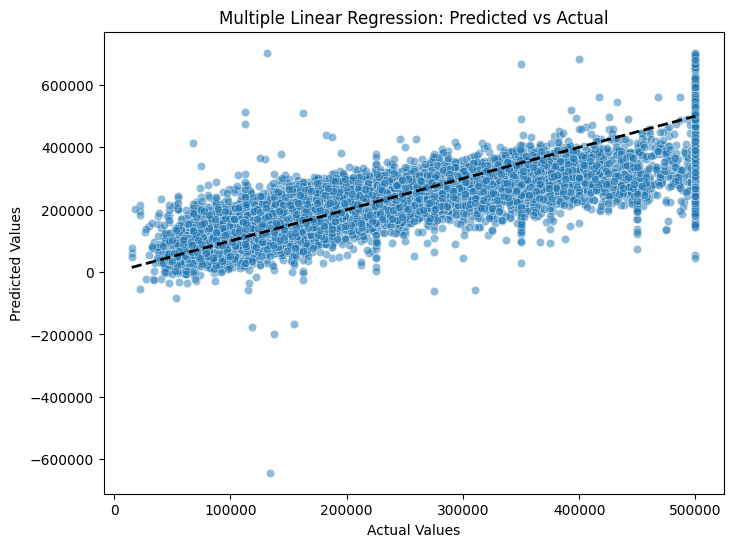

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=lin_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Multiple Linear Regression: Predicted vs Actual")
plt.show()

In [109]:
# Display MSE
metrics.mean_squared_error(y_train, lin_pred)

4655470558.316587

In [110]:
# Display RMSE
metrics.root_mean_squared_error(y_train, lin_pred)

68231.0087739921

In [111]:
# Display MAE
metrics.mean_absolute_error(y_train, lin_pred)

49236.64423115014

In [112]:
# Display R-squared
metrics.r2_score(y_train, lin_pred)

0.6538641315618889

Polynomial Regression Analysis (Quadratic)

In [113]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [114]:
poly_pred = poly_model.predict(X_train)

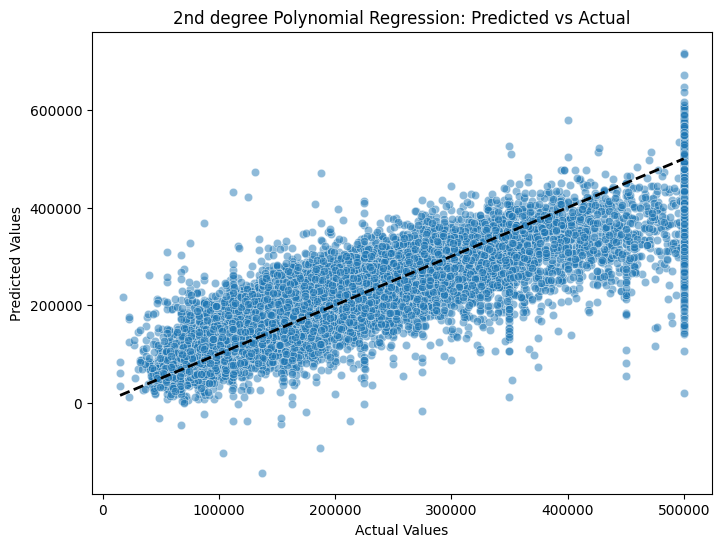

In [115]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=poly_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("2nd degree Polynomial Regression: Predicted vs Actual")
plt.show()

In [116]:
# Display MSE
metrics.mean_squared_error(y_train, poly_pred)

3678254613.4609594

In [117]:
# Display RMSE
metrics.root_mean_squared_error(y_train, poly_pred)

60648.615923703976

In [118]:
# Display MAE
metrics.mean_absolute_error(y_train, poly_pred)

43358.30375871592

In [119]:
# Display R-squared
metrics.r2_score(y_train, poly_pred)

0.7265204797198467

-> Both the models are underfitting the housing data because of high rmse value. Therefore, we need more complex model such as Random Forest Regressor to fit the data.

### **Checking Key Regression Assumptions**

Linear Relationship

Text(0.5, 1.0, 'Multiple Linear Regression: Residuals')

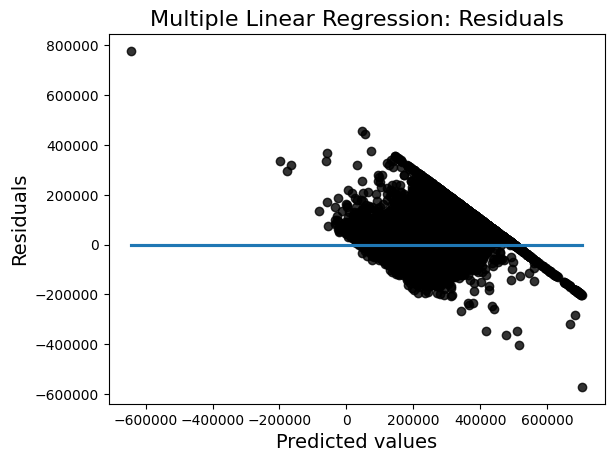

In [120]:
residuals = y_train - lin_pred
p = sns.regplot(x=lin_pred, y=residuals, ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Predicted values', fontsize=14)
p.set_ylabel('Residuals', fontsize=14)
p.set_title("Multiple Linear Regression: Residuals", fontsize=16)

-> In this plot, the residuals spread out in a fan shape as predicted values increase. This suggests that the relationship might not be purely linear, which could be affecting the accuracy of the model.

Normality of Residuals

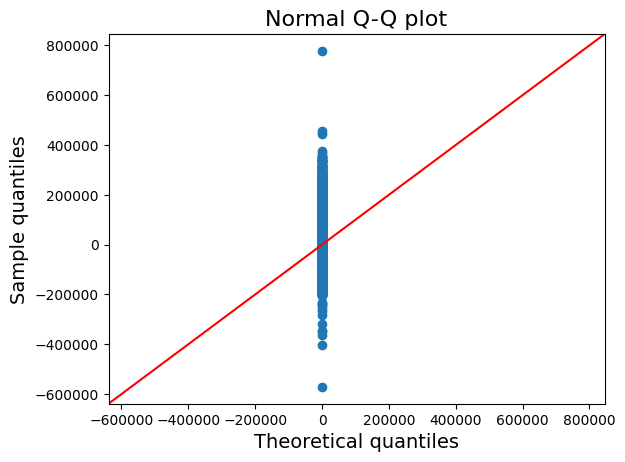

In [121]:
resid = np.ravel(residuals)

p = sm.qqplot(resid, line='45')

plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);

-> The Q-Q plot shows significant deviations from normality, with extreme values at both ends, indicating possible outliers or unmodeled non-linear patterns.

Independence of Residuals

In [122]:
#Durbin-Watson test
dw = sm.stats.durbin_watson(resid)
dw

2.006741175237137

-> The Linear Regression model likely has no autocorrelation issues in the residuals.

-> As two of the above three assumptions have been violated, the linear regression is not a valid approach.

### **Evaluate Model (Linear Regression)**

In [123]:
lin_pred=lin_reg.predict(X_test)

In [124]:
# Display MSE
metrics.mean_squared_error(y_test, lin_pred)

4432865509.758195

In [125]:
# Display RMSE
metrics.root_mean_squared_error(y_test, lin_pred)

66579.76802121043

In [126]:
# Display MAE
metrics.mean_absolute_error(y_test, lin_pred)

48264.025694214906

In [127]:
# Display R-squared
metrics.r2_score(y_test, lin_pred)

0.6542722565593058

K-fold Cross Validation

In [128]:
ten_fold_scores = -cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=10)

In [129]:
np.sqrt(ten_fold_scores.mean())

72372.53567913276

Model Summary

In [130]:
X_train_sm = sm.add_constant(X_train) 

In [131]:
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

In [132]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2204.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:06:00   Log-Likelihood:            -2.0514e+05
No. Observations:               16346   AIC:                         4.103e+05
Df Residuals:                   16331   BIC:                         4.104e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.982e+06   8.23e+04    -24.078      0.000   -2.14e+06   -1.82e+06
longitude           -2.743e+04   1138.092    -24.098      0.000   -2.97e+04   -2.52e+04
latitude            -2.606e+04   1124.292    -23.183      0.000   -2.83e+04   -2.39e+04
housing_median_age   1087.0140     48.803     22.274      0.000     991.355    1182.673
total_rooms             1.6599      1.053      1.577      0.115      -0.404       3.724
total_bedrooms         16.4649      8.625      1.909      0.056      -0.440      33.370
population            -38.5317      1.166    -33.047      0.000     -40.817     -36.246
households             99.9488      8.864     11.276      0.000      82.575     117.323
median_income        4.151e+04    415.541     99.892      0.000    4.07e+04    4.23e+04
bedrooms_per_room    2.787e+05   1.56e+04     17.919      0.000    2.48e+05    3.09e+05
rooms_per_household  2700.5018    268.685     10.051      0.000    2173.851    3227.153
<1H OCEAN           -4.251e+05   1.73e+04    -24.583      0.000   -4.59e+05   -3.91e+05
INLAND              -4.601e+05   1.62e+04    -28.331      0.000   -4.92e+05   -4.28e+05
ISLAND              -2.487e+05   3.32e+04     -7.484      0.000   -3.14e+05   -1.84e+05
NEAR BAY            -4.284e+05   1.78e+04    -24.076      0.000   -4.63e+05   -3.94e+05
NEAR OCEAN          -4.194e+05   1.77e+04    -23.713      0.000   -4.54e+05   -3.85e+05
==============================================================================
Omnibus:                     3970.750   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16199.163
Skew:                           1.151   Prob(JB):                         0.00
Kurtosis:                       7.299   Cond. No.                     7.97e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.05e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### **Interpretations**

1. Total bedrooms show a positive but weak effect on median house value, with a higher p-value (0.056), suggesting it isn’t a strong predictor on its own and has a limited impact compared to other factors.

2. The bedrooms per room ratio has a strong positive effect on median house value, with a high coefficient (278,700) and strong statistical significance. This suggests that homes with more bedrooms relative to rooms tend to be larger or more luxurious, adding to their value.

3. Proximity to the ocean is highly influential, with inland areas having a significant negative impact on house prices. Homes closer to the ocean generally hold higher values, emphasizing the premium associated with ocean proximity. The median_house_value of a district whose ocean_proximity is INLAND reduces by 460,100.

4. The total number of rooms has a minimal effect on house value (p-value of 0.115) which indicates that on its own, room count isn’t a strong predictor of house value.

5. Median income has a much greater impact on house values than housing age, with a large positive coefficient (41,510) and strong significance. While housing age also has a positive effect, its influence is smaller, suggesting that income levels are a more crucial factor in determining housing value than the age of the homes.

Most predictors have p-values below 0.05, indicating they significantly influence median_house_value.

The model shows that housing values are strongly influenced by income levels (higher income means higher house value), proximity to the ocean (closer means higher value), and demographics like population density and household size. Longitude and latitude also significantly affect prices, likely reflecting differences across regions.

The Linear regression model as well as Quadratic regression model performs poorly in capturing underlying patterns of data, as a result they both yield very high rmse value and violate key assumption for linear relationship. Therefore, more complex model like Random Forest Regressor or Support Vector Machines is needed to fit this data.

### **Conclusion**

The model shows that median house values are mainly driven by income levels, proximity to the ocean, and household characteristics. Higher incomes and closer ocean access significantly raise house values, while inland areas generally see lower prices. 

A higher bedrooms-per-room ratio also adds value, likely indicating larger or more luxurious homes. Meanwhile, total rooms and bedrooms have a minimal effect on their own, and housing age has a positive but smaller impact compared to income.

However, there are limitations to consider, the residuals suggest some non-linear relationships that the linear model may not fully capture and there are potential outliers that might skew results.